In [1]:
import pandas as pd
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import os

In [2]:
not_found = pickle.load( open( "../data/not_found.p", "rb" ) )
str(not_found[0])


'../data/celeb_dataset/img_align_celeba/img_align_celeba/000881.jpg'

In [3]:
not_found_img_ids = [not_found[i].name for i in range(len(not_found))]

In [4]:
attr_df = pd.read_csv('../data/celeb_dataset/list_attr_celeba.csv')
attr_df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [5]:
nf_df = attr_df.query('image_id in @not_found_img_ids').set_index('image_id')

In [6]:
f_df = attr_df.query('image_id not in @not_found_img_ids').set_index('image_id')

In [18]:
f_df[col].value_counts()/len(f_df)

 1    0.775638
-1    0.224362
Name: Young, dtype: float64

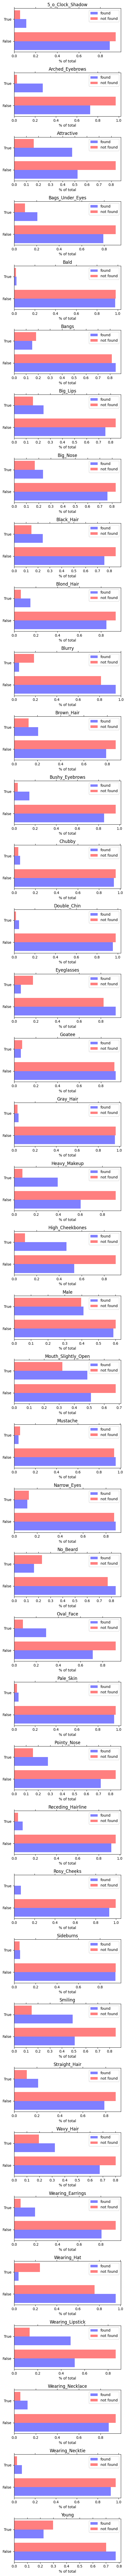

In [35]:
# Calculate the bar width and offset
bar_width = 0.4
bar_offset = bar_width/2

fig, axs = plt.subplots(nrows=len(f_df.columns), figsize=(5, 100))

for i, col in enumerate(f_df.columns):
    # Calculate the position for the bars
    positions = np.arange(len(f_df[col].value_counts()))

    # Plot the found count bars
    axs[i].barh(positions - bar_offset, f_df[col].value_counts()/len(f_df), height=bar_width, color='blue',
                alpha=0.5, label='found')

    # Plot the not found count bars
    axs[i].barh(positions + bar_offset, nf_df[col].value_counts()/len(nf_df), height=bar_width, color='red',
                alpha=0.5, label='not found')

    axs[i].set_yticks(positions)
    # axs[i].set_yticklabels(f_df[col].value_counts().index)
    axs[i].set_yticklabels(['False', 'True'])

    axs[i].tick_params(top=True)
    
    axs[i].set_xlabel('% of total')
    axs[i].set_title(col)
    axs[i].legend()

plt.tight_layout()
plt.show()


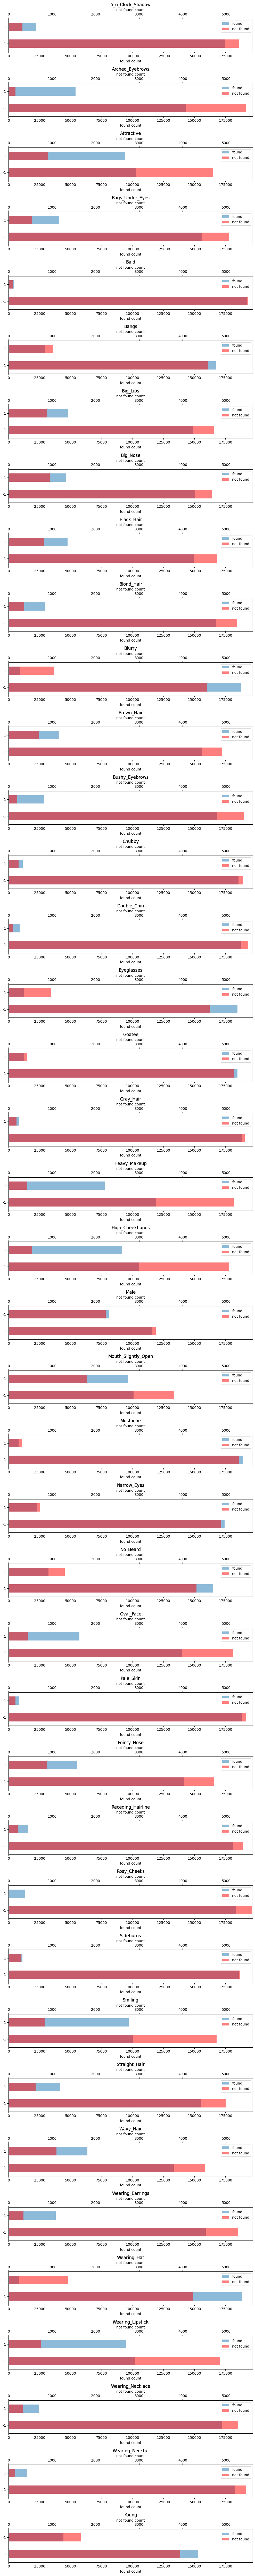

In [7]:
fig, axs = plt.subplots(nrows=len(f_df.columns), figsize=(10, 100))
for i, col in enumerate(f_df.columns):
    axs[i].set_xlim(0,f_df[col].value_counts().sum())
    f_df[col].value_counts().plot.barh(ax=axs[i], title=col, alpha=0.5, xlabel='found count')
    
    twinx = axs[i].twiny()
    twinx.set_xlim(0,nf_df[col].value_counts().sum())
    nf_df[col].value_counts().plot.barh(ax=twinx, color='red', alpha=0.5, title=col, xlabel='not found count' )
    handles1, labels1 = axs[i].get_legend_handles_labels()
    handles2, labels2 = twinx.get_legend_handles_labels()

    # Concatenate the handles and labels into a single list for the legend
    handles = handles1 + handles2
    labels = ['found', 'not found'] 
    axs[i].legend(handles, labels)  


plt.tight_layout()
plt.show()

<Axes: >

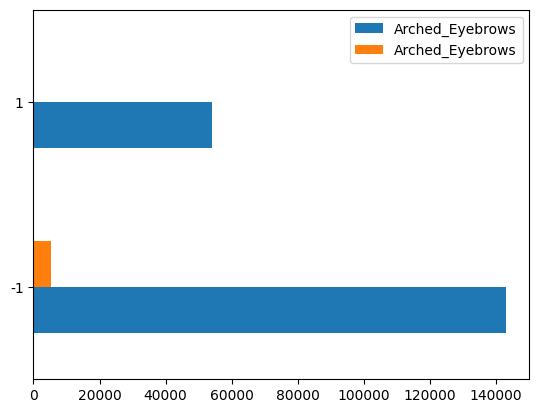

In [8]:
nf_df['Arched_Eyebrows'].value_counts()
pd.concat([f_df['Arched_Eyebrows'].value_counts(), nf_df['Arched_Eyebrows'].value_counts()], axis=1).plot.barh()

In [9]:
f_df.shape

(196990, 40)

In [10]:
sf_df = f_df.sample(n = 40000, random_state=42)

In [11]:
def plot_compare_features(df1,df2, image_title = "", legend_labels=  ['found', 'sampled found'] ):
    fig, axs = plt.subplots(nrows=len(df1.columns), figsize=(10, 100))
    for i, col in enumerate(df1.columns):
        axs[i].set_xlim(0,df1[col].value_counts().sum())
        df1[col].value_counts().plot.barh(ax=axs[i], title=col, alpha=0.5, xlabel='found count')

        twinx = axs[i].twiny()
        twinx.set_xlim(0,df2[col].value_counts().sum())
        df2[col].value_counts().plot.barh(ax=twinx, color='red', alpha=0.5, title=col, xlabel='sampled found count' )
        handles1, labels1 = axs[i].get_legend_handles_labels()
        handles2, labels2 = twinx.get_legend_handles_labels()

        # Concatenate the handles and labels into a single list for the legend
        handles = handles1 + handles2
        labels = legend_labels
        axs[i].legend(handles, labels)

    plt.tight_layout()
    plt.show()
    if image_title != "":
        plt.savefig(f'../data/celeb_dataset/{image_title}.png')


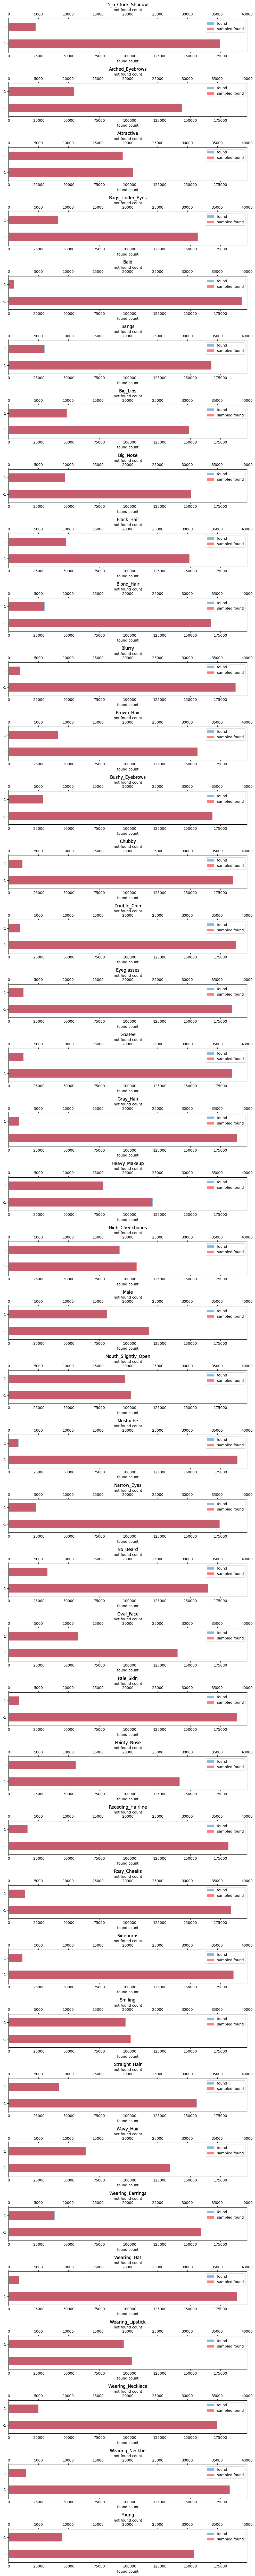

In [12]:
fig, axs = plt.subplots(nrows=len(f_df.columns), figsize=(10, 100))
for i, col in enumerate(f_df.columns):
    axs[i].set_xlim(0,f_df[col].value_counts().sum())
    f_df[col].value_counts().plot.barh(ax=axs[i], title=col, alpha=0.5, xlabel='found count')
    
    twinx = axs[i].twiny()
    twinx.set_xlim(0,sf_df[col].value_counts().sum())
    sf_df[col].value_counts().plot.barh(ax=twinx, color='red', alpha=0.5, title=col, xlabel='not found count' )
    handles1, labels1 = axs[i].get_legend_handles_labels()
    handles2, labels2 = twinx.get_legend_handles_labels()

    # Concatenate the handles and labels into a single list for the legend
    handles = handles1 + handles2
    labels = ['found', 'sampled found'] 
    axs[i].legend(handles, labels)  


plt.tight_layout()
plt.show()

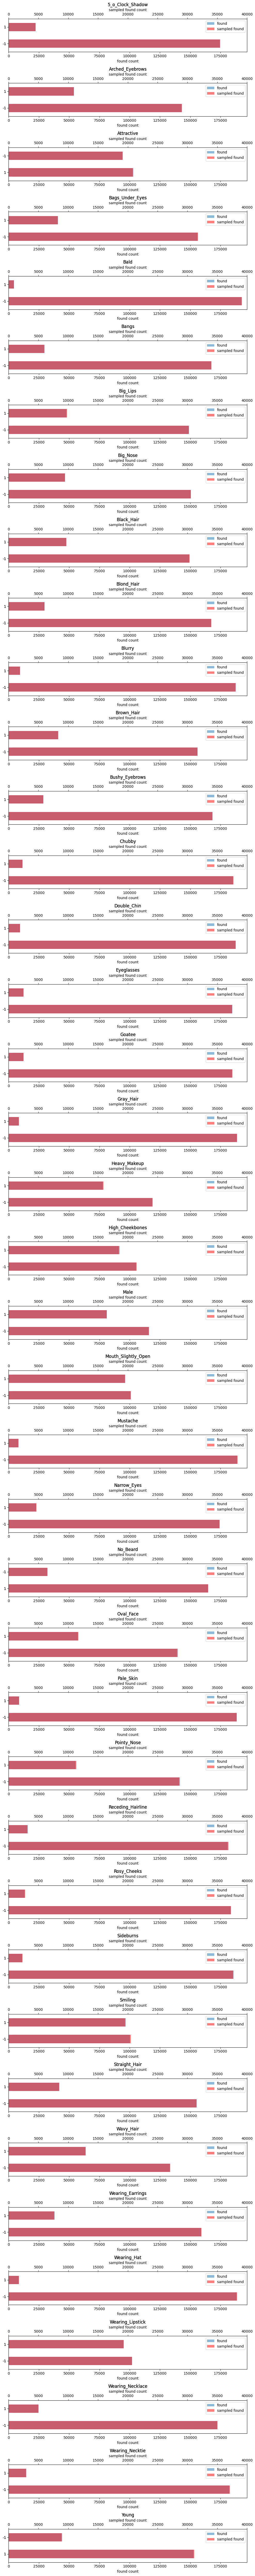

<Figure size 640x480 with 0 Axes>

In [13]:
plot_compare_features(f_df, sf_df, image_title='compare_features')

In [14]:
# protected features: ovalface, attractiveness, age, gender, pale skin
f_df.head(5).T

image_id,000001.jpg,000002.jpg,000005.jpg,000006.jpg,000007.jpg
5_o_Clock_Shadow,-1,-1,-1,-1,1
Arched_Eyebrows,1,-1,1,1,-1
Attractive,1,-1,1,1,1
Bags_Under_Eyes,-1,1,-1,-1,1
Bald,-1,-1,-1,-1,-1
Bangs,-1,-1,-1,-1,-1
Big_Lips,-1,-1,1,1,1
Big_Nose,-1,1,-1,-1,1
Black_Hair,-1,-1,-1,-1,1
Blond_Hair,-1,-1,-1,-1,-1


In [15]:
f_df.query("Pale_Skin == -1 and Black_Hair == 1 and Wavy_Hair == 1")

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000027.jpg,-1,1,1,-1,-1,-1,1,-1,1,-1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
000035.jpg,-1,1,1,-1,-1,-1,1,-1,1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
000046.jpg,-1,-1,1,-1,-1,1,1,-1,1,-1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
000055.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,1,-1
000073.jpg,-1,-1,1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202533.jpg,-1,-1,1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
202554.jpg,1,-1,-1,1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
202572.jpg,-1,1,1,-1,-1,-1,-1,1,1,-1,...,-1,-1,-1,1,1,-1,1,1,-1,1


In [16]:
import face_recognition
from IPython.display import clear_output

In [17]:
def show_image(image_path):
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    plt.title("Input Stream")
    plt.imshow(image)        

    # Find all the faces and face encodings in the current frame of video

    # If faces were found, we will mark it on frame with blue dots
    for face_location in face_locations:        
        plt.plot(face_location[1], face_location[0], 'bo')
        plt.plot(face_location[1], face_location[2], 'bo')
        plt.plot(face_location[3], face_location[2], 'bo')
        plt.plot(face_location[3], face_location[0], 'bo')
    print(face_locations)
    # Show frame...
    plt.show() 
    clear_output(wait=True)

In [18]:
import numpy as np
import cv2

[]


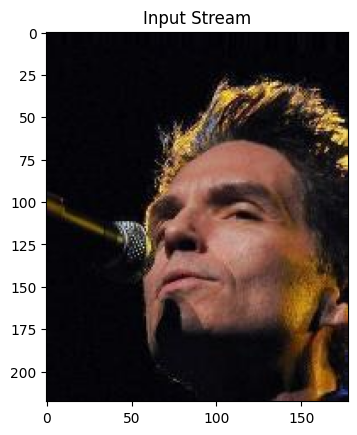

In [19]:
show_image(not_found[0])

In [20]:
parent_dir = str(not_found[0].parent)
example_img_path = parent_dir + '/'+ sf_df.index[0]

[(86, 135, 176, 46)]


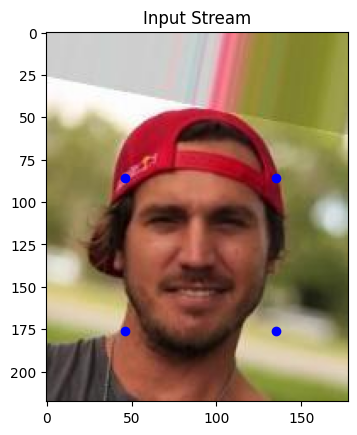

In [21]:
show_image(example_img_path)

In [2]:
new_parent_dir =str(not_found[0].parent.parent)
new_parent_dir

# Check if darker_skin and lighter_skin directories exist else create it.
if not os.path.exists(new_parent_dir + '/darker_skin/'):
    os.makedirs(new_parent_dir + '/darker_skin/')

if not os.path.exists(new_parent_dir + '/lighter_skin/'):
    os.makedirs(new_parent_dir + '/lighter_skin/')


NameError: name 'not_found' is not defined

In [1]:
new_parent_dir

NameError: name 'new_parent_dir' is not defined

In [27]:
for img in tqdm(sf_df.index):
    create_filtered_images(rf'{parent_dir}/{img}', rf'{new_parent_dir}/darker_skin/{img}',rgb=(1,7,38), alpha=0.7)

for img in tqdm(nf_df.index):
    create_filtered_images(rf'{parent_dir}/{img}', rf'{new_parent_dir}/darker_skin/{img}',   rgb=(1,7,38), alpha=0.7)


100%|██████████| 5609/5609 [00:04<00:00, 1217.33it/s]


In [28]:
skin_color = (250,231,218)
for img in tqdm(sf_df.index):
    create_filtered_images(f'{parent_dir}/{img}', f'{new_parent_dir}/lighter_skin/{img}',rgb=skin_color)
for img in tqdm(nf_df.index):
    create_filtered_images(f'{parent_dir}/{img}', f'{new_parent_dir}/lighter_skin/{img}',rgb=skin_color)

100%|██████████| 5609/5609 [00:04<00:00, 1243.32it/s]


In [29]:
show_image(f'{new_parent_dir}/lighter_skin/000002.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '../data/celeb_dataset/img_align_celeba/lighter_skin/000002.jpg'

In [ ]:
new_parent =str(not_found[1].parent.parent)


In [ ]:
create_filtered_images(f'{parent_dir}/{img}',rf'{parent_dir}/darker_skin/{img}',rgb=(1,7,38), alpha=0.6)

In [ ]:
new_parent_dir = parent_dir.split('/')[-1].join('/')

In [ ]:
rf'{new_parent_dir}/darker_skin/{img}'

In [ ]:
create_filtered_images(f'{parent_dir}/{img}',rf'{new_parent_dir}/darker_skin/{img}',rgb=(1,7,38), alpha=0.6)

In [ ]:
show_image(f'{new_parent_dir}/darker_skin/168808.jpg')